<a href="https://colab.research.google.com/github/fajni/DWKD-SPOZ/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Algoritam

## Uvoz i ispis podataka

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plot
%matplotlib inline

In [47]:
!wget https://github.com/fajni/DWKD-SPOZ/raw/main/Data/MasinskoUcenje.csv -O MasinskoUcenje.csv

df = pd.read_csv("MasinskoUcenje.csv", encoding='ISO-8859-1').head(500) # Uzimanje prvih 500 redova, zbog performansi i bolje vizuelizacije
# df['Sales'] = df['UnitPrice'] * df['OrderQuantity'] * np.where(df['Discount'] == 0, 1, df['Discount'])
df['Sales'] = df['UnitPrice'] * df['OrderQuantity']
df['Expenses'] = df['Sales'] - df['Profit']
df

--2024-08-16 10:36:38--  https://github.com/fajni/DWKD-SPOZ/raw/main/Data/MasinskoUcenje.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fajni/DWKD-SPOZ/main/Data/MasinskoUcenje.csv [following]
--2024-08-16 10:36:38--  https://raw.githubusercontent.com/fajni/DWKD-SPOZ/main/Data/MasinskoUcenje.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1085687 (1.0M) [application/octet-stream]
Saving to: ‘MasinskoUcenje.csv’

MasinskoUcenje.csv  100%[===================>]   1.04M  --.-KB/s    in 0.009s  

2024-08-16 10:36:38 (116 MB/s) - ‘MasinskoUcenje.csv’ saved [1085687/1085687]



,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,106.36,192,85.64
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,45.64,192,146.36
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,33.90,123,89.10
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,605.08,1168,562.92
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,2647.66,4343,1695.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,-4.88,4,8.88
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,6546.85,9045,2498.15
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,31.48,96,64.52
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,1322.54,1634,311.46


## Odnos između *Profit* (Profita) i *Sales* (Prodaja)

Kao glavne varijable za K - Means algoritam se koriste Profit i Sales varijable. Cilj je otkriti različite grupe ili klastere unutar ovih podataka.

Korišćenje Profita i Prodaje u K - Means algoritmu može pomoći u segmentaciji tržišta, analizi performansi proizvoda i donošenju informisanih poslovnih odluka na osnovu identifikovanih klastera.

Primer: Identifikovati grupe proizvoda sa sličnim karakteristikama. Algoritam će pokušati da pronađe klastere gde su proizvodi slični po ovim dimenzijama.



Razlog: Vizuelizacija kako se profit menja u zavisnosti od prodaje i za identifikovanje eventualnih obrazaca ili klastera u podacima

Text(0, 0.5, 'Profit')

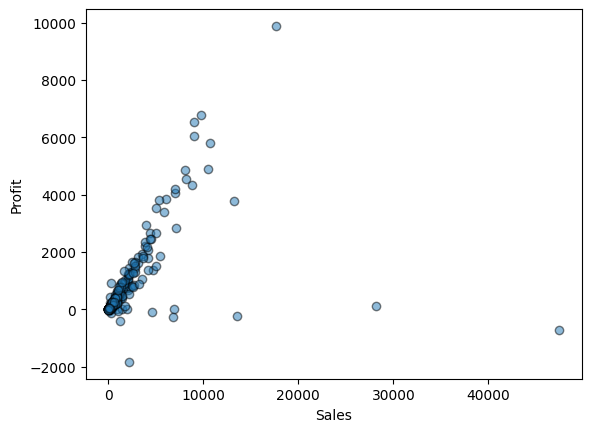

In [48]:
# Vizuelni grafikon odnosa između Profita (Profit) i Prodaja (Sales)

plot.scatter(df.Sales, df['Profit'], alpha=0.5, edgecolors='black') # isto je df.Profit ili df['Profit']
plot.xlabel('Sales')
plot.ylabel('Profit')

## Kreiranje i treniranje modela pre skaliranja i pre metode lakta

K - Means algoritam unapred zahteva broj klastera (parametar *n_clusters* ili K).

Prvi korak u kreiranju modela je definisanje nasumičnih tačaka koje predstavljaju centre klastera (centroidi/težišta). Ovi centroidi mogu biti postavljleni bilo gde na našem 2D prostoru.

> Kasnije o metodi lakta (*eng. Elbow Method*)



In [49]:
# Kreiranje instance K Means modela sa nasumičnim brojem centroida, K = 3. K predstavlja broj klastera, tj. težišta klastera

km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

Nakon definisanja broja klastera (K), potrebno je svaku tačku podataka (*red u tabeli*) dodeliti u najbliži klaster. Svaka tačka podataka treba pripadati najbližem klasteru koji može biti 0, 1 ili 2.

In [50]:
# Treniranje modela, tj. određivanje centara klastera (fit),
# Dodeljivanje svakog podatka u jedan od klastera na osnovu minimalne udaljenosti od centroida (predict)
# Rezultat je niz koji sadrži oznake klastera za svaki red u nasem skupu podataka
#   n_clusters = 3, vrednosti y_predicted su 0, 1, 2

y_predicted = km.fit_predict(df[['Sales', 'Profit']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
# Svakoj tački podataka (redu) dodeliti njen klaster (redni broj klastera) u tabeli

df['Cluster'] = y_predicted
df

,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,106.36,192,85.64,0
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,45.64,192,146.36,0
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,33.90,123,89.10,0
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,605.08,1168,562.92,0
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,2647.66,4343,1695.34,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,-4.88,4,8.88,0
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,6546.85,9045,2498.15,2
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,31.48,96,64.52,0
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,1322.54,1634,311.46,0


### Vizuelizacija rezultata K - Means klasterovanja

Za bolju vizuelizaciju rezultata klasterovanja kreiraju se novi data setovi, gde svaki set predstavlja poseban klaster.

Sledeći grafikon vizuelno prikazuje podatke iz 3 različita klastera dobijena primenom K - Means algoritma. Svaki klaster je predstavljen tačkama različite boje.

Rezultat: Vizuelni prikaz kako su podaci grupisani na osnovu sličnosti između 'Sales' i 'Profit'.

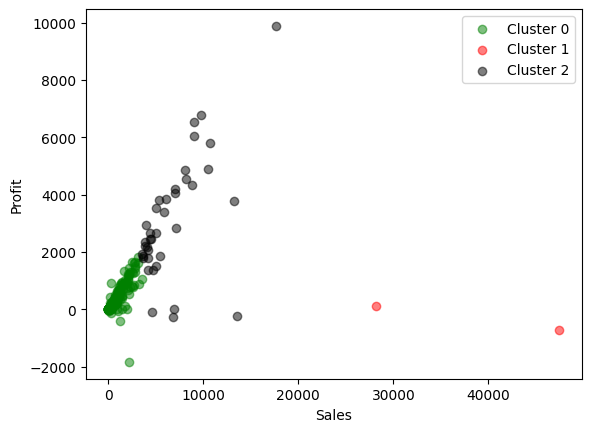

In [52]:
# Svaki cluster pripada svom data frame - u

df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
#df3 = df[df.Cluster == 3]
#df4 = df[df.Cluster == 4]
#df5 = df[df.Cluster == 5]
#df6 = df[df.Cluster == 6]
#df7 = df[df.Cluster == 7]
#df8 = df[df.Cluster == 8]

# X osa koristi vrednosti Sales, Y osa koristi vrednosti Profit

plot.scatter(df0.Sales, df0.Profit, color='green', label = 'Cluster 0', alpha=0.5)
plot.scatter(df1.Sales, df1.Profit, color='red', label = 'Cluster 1', alpha=0.5)
plot.scatter(df2.Sales, df2.Profit, color='black', label = 'Cluster 2', alpha=0.5)
#plot.scatter(df3.Sales, df3.Profit, color='blue', label = 'Cluster 3')
#plot.scatter(df4.Sales, df4.Profit, color='orange', label = 'Cluster 4')
#plot.scatter(df5.Sales, df5.Profit, color='brown', label = 'Cluster 5')
#plot.scatter(df5.Sales, df5.Profit, color='aqua', label = 'Cluster 6')
#plot.scatter(df5.Sales, df5.Profit, color='purple', label = 'Cluster 7')
#plot.scatter(df5.Sales, df5.Profit, color='pink', label = 'Cluster 8')

plot.xlabel('Sales')
plot.ylabel('Profit')

plot.legend()
plot.show()

## Skaliranje podataka

Za bolju tačnosti klasterovanja, izvršeno je skaliranje podataka.

Skaliranje podataka pre primene K - Means algoritma je ključno za dobijanje tačnijih i pouzdanijih rezultata, posebno kada se koriste različite karakteristike sa različitim opsezima vrednosti. Ovo pomaže u postizanju pravednog odnosa svake karakteristike prilikom klasterovanja i omogućava algoritmu da ispravno identifikuje slične grupe unutar podataka.

In [53]:
# Instanca MinMaxScaler klase koja ce se koristiti za skaliranje vrednosti u kolonama

scaler_profit = MinMaxScaler()
scaler_sales = MinMaxScaler()


# Profit i Sales u opsegu 0-1
# Računanje minimalne i maksimalne vrednosti u kolonama (fit)
# Transformacija podataka, zamenjuje originalne vrednosit skaliranim (transform)

scaler_profit.fit(df[['Profit']])
df['Profit'] = scaler_profit.transform(df[['Profit']])

scaler_sales.fit(df[['Sales']])
df['Sales'] = scaler_sales.transform(df[['Sales']])


df

,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,0.165488,0.004002,85.64,0
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,0.160306,0.004002,146.36,0
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,0.159305,0.002548,89.10,0
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,0.208045,0.024558,562.92,0
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,0.382345,0.091430,1695.34,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,0.155995,0.000042,8.88,0
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,0.715076,0.190463,2498.15,2
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,0.159098,0.001980,64.52,0
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,0.269268,0.034373,311.46,0


## Metoda lakta (Elbow method)

In [54]:
k_range = range(1, 10)
sse = []
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(df[['Sales', 'Profit']])
  sse.append(km.inertia_)

sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[5.915385498033427,
 2.636190085878293,
 1.6069384066726642,
 0.9050171537946474,
 0.6558331253954118,
 0.5164518371661222,
 0.4108842620179459,
 0.3132041635163541,
 0.2413866849620815]

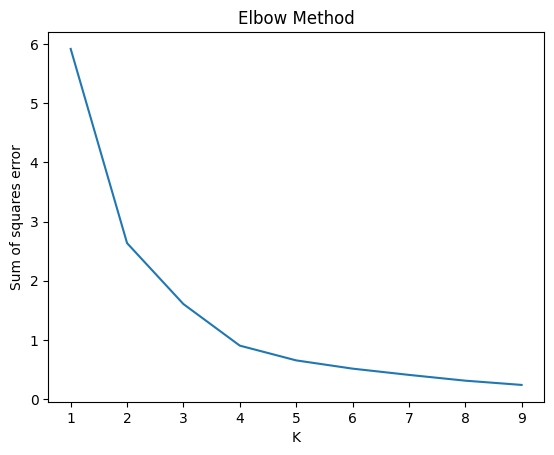

In [55]:
plot.title('Elbow Method')
plot.xlabel('K')
plot.ylabel('Sum of squares error')
plot.plot(k_range, sse)

## Kreiranje i treniranje modela posle skaliranja i posle metode lakta

In [56]:
# Ponovno kreiranje modela K - Means algoritma nakon skaliranja
# Ovde se kreira novi model sa prethodno određenim brojem klastera korišćenjem metode lakta

km = KMeans(n_clusters=4)

y_predicted = km.fit_predict(df[['Sales', 'Profit']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,

In [57]:
df['Cluster'] = y_predicted
#df.drop('cluster', axis='columns', inplace=True)
df

,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,0.165488,0.004002,85.64,1
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,0.160306,0.004002,146.36,1
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,0.159305,0.002548,89.10,1
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,0.208045,0.024558,562.92,1
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,0.382345,0.091430,1695.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,0.155995,0.000042,8.88,1
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,0.715076,0.190463,2498.15,2
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,0.159098,0.001980,64.52,1
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,0.269268,0.034373,311.46,0


In [58]:
# Ispis svih centroida, i njihove pozicija na grafikonu (2D prostoru)
# centroidi (x, y)
# km.cluster_centers_

for i, centroid in enumerate(km.cluster_centers_):
    print(f"Centroid {i}: {centroid}")

Centroid 0: [0.06613638 0.27874117]
Centroid 1: [0.00723834 0.16637779]
Centroid 2: [0.18583216 0.58492784]
Centroid 3: [0.79668906 0.12998656]


### Konačna vizuelizacija K - Means klasterovanja

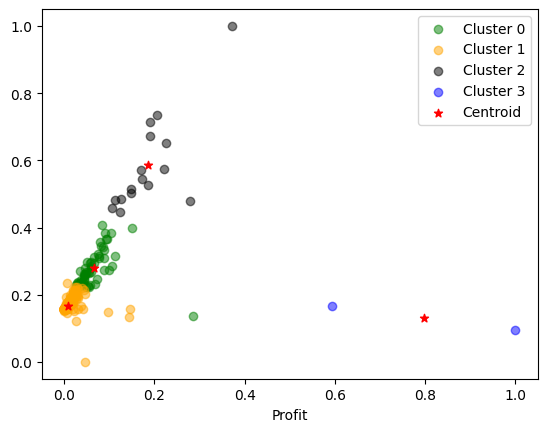

In [59]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]

plot.scatter(df0.Sales, df0.Profit, color='green', label = 'Cluster 0', alpha=0.5)
plot.scatter(df1.Sales, df1.Profit, color='orange', label = 'Cluster 1', alpha=0.5)
plot.scatter(df2.Sales, df2.Profit, color='black', label = 'Cluster 2', alpha=0.5)
plot.scatter(df3.Sales, df3.Profit, color='blue', label = 'Cluster 3', alpha=0.5)

plot.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color='red', marker='*', label='Centroid') # [:, 0] - : oznacava sve redove, 0 oznacava 0. kolonu

plot.xlabel('Sales')
plot.xlabel('Profit')
plot.legend()
plot.show()

## Pregled i analiza rezultata

In [60]:
# Prvi klaster

print("Cluster 0: ", df0.shape[0])
df0

Cluster 0:  56


,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,0.382345,0.091430,1695.34,0
5,"Dual Level, Single-Width Filing Carts",Scott Bunn,North America,1,5,0.05,155,32,7,0.59,0.384371,0.104425,2288.60,0
33,3285,Marshall Xu,EMEA,3,10,0.01,206,11,6,0.59,0.268052,0.047684,957.72,0
38,232,Rosemary Hedrick,AsiaPac,4,15,0.04,126,25,5,0.55,0.293073,0.066303,1548.50,0
44,Luxo Professional Fluorescent Magnifier Lamp w...,Betsy Puckett,North America,4,15,0.02,210,10,21,0.59,0.256764,0.044188,924.00,0
74,Polycom ViewStation ISDN Videoconferencing Unit,Don Rogers,North America,2,7,0.07,6783,2,24,0.06,0.136999,0.285684,13793.49,0
81,GBC DocuBind TL300 Electric Binding System,Eugene Clayton,North America,3,10,0.03,897,6,20,0.38,0.315447,0.113313,3518.30,0
97,Panasonic KX-P3200 Dot Matrix Printer,Sylvia Kumar,North America,1,5,0.03,298,12,15,0.57,0.319914,0.075275,1659.96,0
103,Okidata ML320 Series Turbo Dot Matrix Printers,Vicki Hauser,North America,1,5,0.08,400,5,12,0.56,0.237308,0.042082,1052.00,0
109,Global Leather Executive Chair,Tammy Meyers,AsiaPac,1,5,0.05,351,12,39,0.55,0.332796,0.088671,2145.00,0


In [61]:
# Drugi klaster

print("Cluster 1: ", df1.shape[0])
df1

Cluster 1:  426


,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,0.165488,0.004002,85.64,1
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,0.160306,0.004002,146.36,1
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,0.159305,0.002548,89.10,1
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,0.208045,0.024558,562.92,1
6,"Black Print Carbonless Snap-Off® Rapid Letter,...",Marjorie Bailey,AsiaPac,4,15,0.09,9,16,2,0.40,0.160050,0.002991,101.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Xerox 210,Vickie Morse,North America,2,7,0.06,6,5,7,0.37,0.156608,0.000590,27.70,1
493,i2000,Kent Burton,North America,4,15,0.07,126,1,3,0.60,0.161854,0.002612,62.22,1
494,US Robotics 56K V.92 External Faxmodem,Jessica Huffman,North America,4,15,0.03,100,6,20,0.52,0.179793,0.012595,326.00,1
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,0.155995,0.000042,8.88,1


In [62]:
# Treci klaster

print("Cluster 2: ", df2.shape[0])
df2

Cluster 2:  16


,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
62,"Riverside Palais Royal Lawyers Bookcase, Royal...",Derek Jernigan,North America,4,15,0.04,881,8,45,0.62,0.501401,0.148402,3005.16,2
173,Global Leather Executive Chair,Veronica Garrett,AsiaPac,2,7,0.05,351,25,39,0.55,0.527484,0.184776,4426.50,2
199,"Riverside Palais Royal Lawyers Bookcase, Royal...",Anna Ellis,North America,1,5,0.02,881,8,45,0.62,0.513429,0.148402,2864.20,2
224,Bretford Rectangular Conference Table Tops,Ellen Ennis Lehman,EMEA,2,7,0.06,376,24,86,0.74,0.672706,0.190021,2973.68,2
265,"Global High-Back Leather Tilter, Burgundy",Scott Bunn,North America,3,10,0.09,123,49,70,0.74,0.484736,0.126898,2179.45,2
314,Global Enterprise Series Seating High-Back Swi...,Joe Baldwin,North America,4,15,0.07,271,36,50,0.77,0.734903,0.205438,2976.80,2
334,Electrix Halogen Magnifier Lamp,Paul Tate,North America,4,15,0.03,194,42,12,0.59,0.544753,0.171571,3597.12,2
335,O'Sullivan Living Dimensions 2-Shelf Bookcases,Gail Lin,EMEA,4,15,0.02,121,44,59,0.75,0.483027,0.112092,1496.48,2
343,Chromcraft Rectangular Conference Tables,Neal Wolfe,North America,0,0,0.00,237,34,59,0.61,0.570823,0.169675,3201.62,2
356,Bretford Just In Time Height-Adjustable Mult...,Doris Fitzpatrick,North America,4,15,0.07,417,12,75,0.79,0.457457,0.105352,1476.12,2


In [63]:
# Cetvrti klaster

print("Cluster 3: ", df3.shape[0])
df3

Cluster 3:  2


,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
13,Polycom ViaVideo Desktop Video Communications...,Mary Washington Hudson,AsiaPac,1,5,0.05,575,49,24,0.06,0.166385,0.593378,28058.12,3
67,Polycom ViewStation ISDN Videoconferencing Unit,Bruce Kahn,EMEA,2,7,0.07,6783,7,24,0.06,0.093588,1.000000,48217.22,3


In [20]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]

print('\nCluster 0:')
print(df0[['Profit', 'Sales']].describe())

print('\nCluster 1:')
print(df1[['Profit', 'Sales']].describe())

print('\nCluster 2:')
print(df2[['Profit', 'Sales']].describe())

print('\nCluster 3:')
print(df3[['Profit', 'Sales']].describe())


Cluster 0:
           Profit       Sales
count  469.000000  469.000000
mean     0.561060    0.003739
std      0.025095    0.011473
min      0.439413    0.000000
25%      0.550810    0.000126
50%      0.552914    0.000511
75%      0.563549    0.002770
max      0.670645    0.123302

Cluster 1:
       Profit  Sales
count     1.0    1.0
mean      0.0    1.0
std       NaN    NaN
min       0.0    1.0
25%       0.0    1.0
50%       0.0    1.0
75%       0.0    1.0
max       0.0    1.0

Cluster 2:
          Profit      Sales
count  25.000000  25.000000
mean    0.784620   0.019830
std     0.094323   0.015822
min     0.676596   0.001780
25%     0.710162   0.006550
50%     0.752638   0.014025
75%     0.835940   0.030623
max     1.000000   0.054365

Cluster 3:
         Profit     Sales
count  5.000000  5.000000
mean   0.340137  0.243145
std    0.075977  0.128014
min    0.263720  0.117674
25%    0.274061  0.187989
50%    0.324331  0.204297
75%    0.412030  0.249999
max    0.426544  0.455768


In [64]:
# Vracanje skaliranih podataka u pocetni oblik

df['Sales'] = scaler_sales.inverse_transform(df[['Sales']])
df['Profit'] = scaler_profit.inverse_transform(df[['Profit']])

df

,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,106.36,192.0,85.64,1
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,45.64,192.0,146.36,1
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,33.90,123.0,89.10,1
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,605.08,1168.0,562.92,1
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,2647.66,4343.0,1695.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,-4.88,4.0,8.88,1
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,6546.85,9045.0,2498.15,2
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,31.48,96.0,64.52,1
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,1322.54,1634.0,311.46,0
